**# Prasunet Internship Task_1**

# By: Nithin Kumar Reddy

# Problem Statement :

 Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

# **Dataset:**  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score
import plotly.express as px
import plotly.graph_objects as go

In [79]:
houses_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [80]:
print("\nInformation About the Dataset:")
print("Number of Rows:", len(houses_data))
print("Number of Columns:", len(houses_data.columns))
print("\nSample Data (first 5 rows):")
houses_data.head()


Information About the Dataset:
Number of Rows: 1460
Number of Columns: 81

Sample Data (first 5 rows):


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [82]:
houses_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [83]:
columns_with_null = houses_data.columns[houses_data.isnull().any()]
print("Columns with Null Values:")
print(columns_with_null)

Columns with Null Values:
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [84]:
missing_values = houses_data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print("\nColumns with Missing Values:")
print(columns_with_missing_values)


Columns with Missing Values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [85]:
duplicates_before = houses_data.duplicated().sum()
houses_data.drop_duplicates(inplace=True)
duplicates_after = houses_data.duplicated().sum()
if duplicates_before > 0:
    print(f"Handling Duplicates\n{duplicates_before} duplicate row(s) were found and removed.")
else:
    print("Handling Duplicates\nNo duplicate rows found in the dataset.")

Handling Duplicates
No duplicate rows found in the dataset.


In [86]:
# fig = px.scatter_3d(data_set,x = 'LotArea', y='BedroomAbvGr',z = 'SalePrice')
# fig.show()
fig = px.scatter_3d(houses_data,x = 'LotArea', y='LotFrontage',z = 'SalePrice')
fig.show()

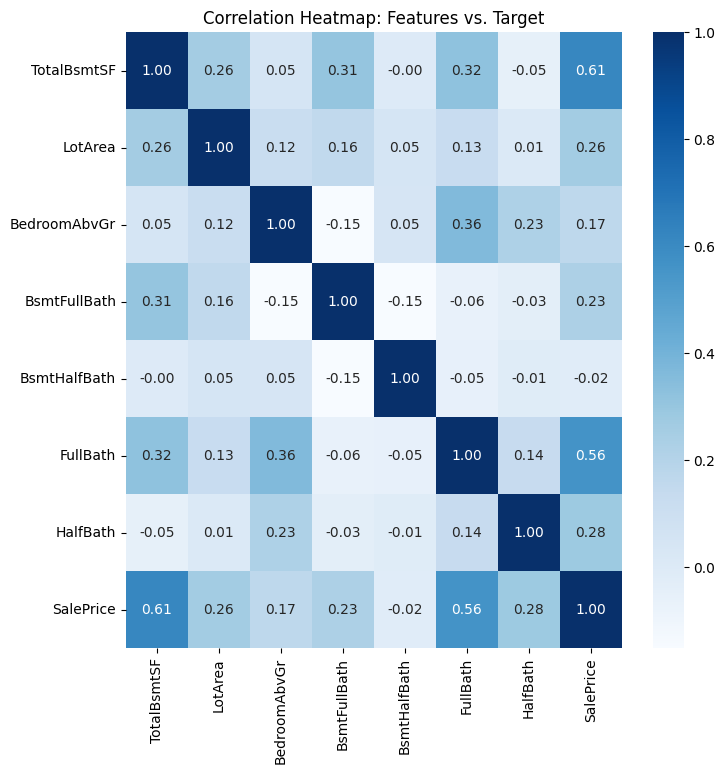

In [87]:
features = houses_data[['TotalBsmtSF','LotArea' , 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]
target = houses_data[['SalePrice']]

data_subset = pd.concat([features, target], axis=1)

correlation_matrix = data_subset.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap: Features vs. Target")
plt.show()

In [88]:
X = houses_data[['TotalBsmtSF', 'LotArea' ,'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath',"FullBath", "HalfBath"]]
y = houses_data['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [90]:
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [ 7.57839601e+01  6.25191779e-01 -5.03014907e+03  1.65397496e+04
  1.18010366e+03  5.64864759e+04  4.04838663e+04]
Intercept: -2814.166743277281


In [91]:
Y_pred = model.predict(X_test)

In [92]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2669484734.77
R-squared: 0.65


In [93]:
print(f'Predicted prices: {Y_pred}')


Predicted prices: [125277.54295425 270626.23784774 125603.96111004 174281.39265276
 247471.97544321 113857.96551801 150511.93533622 201772.92728934
 114136.17585983 151199.84753041 165432.13780302 126762.09365415
 122616.3233476  216391.43085945 210617.5045942  142120.57865946
 204364.81166044 124530.15314262 125471.3382801  228389.85179928
 205752.74031439 199381.01152065 213417.7969808  134754.1726485
 225692.28862536 195897.46856124 202182.42598382 121054.27279044
 212504.60489386 205202.96215582  81427.15427785 234367.00862333
 283929.78971743 121056.84133316 243046.16889735 146963.9546022
 191653.88249525 199837.64187361 252521.50791686  51553.1969985
 104322.77006782 229486.85096487 116677.24539692 298245.4869998
 136213.69638756 167587.67007388 117603.47847931 132335.52821533
 291018.26786009 152393.08492051 109469.99178017 241530.46007087
 100738.82982508 244929.35626575 132221.30898693 250297.83252255
 213996.99607802 191341.04941332 137991.68102747  48113.39182843
  92003.532

In [94]:
print(f'Actual prices: {Y_test.values}')


Actual prices: [154500 325000 115000 159000 315500  75500 311500 146000  84500 135500
 145000 130000  81000 214000 181000 134500 183500 135000 118400 226000
 155000 210000 173500 129000 192000 153900 181134 141000 181000 208900
 127000 284000 200500 135750 255000 140000 138000 219500 310000  97000
 114500 205000 119500 253293 128500 117500 115000 127000 451950 144000
 119000 196000 115000 287000 144500 260000 213000 175000 107000 107500
  68500 154000 317000 264132 283463 243000 109000 305000  93500 176000
 118858 134000 109008  93500 611657 173000 348000 341000 141000 124900
 118000  67000 113000  91300 149500 133000 266000 190000 155900 155835
 153500 152000 124500 301000 136500 169990 205000 183900 204900 260000
 163500 224900 244000 132000 194000 156500 156000 275000 145000 135000
  60000 124000 127000 137500 213500 119000 107900 123000 112000 284000
 133000 149000 169000 207000 175000 137000 236000  79500 144000 162900
 185900 369900 197900 104000  35311 337500 367294 130250 23000

In [95]:

print (f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(Y_test, Y_pred):.2f}')

Mean Absolute Percentage Error: 0.20


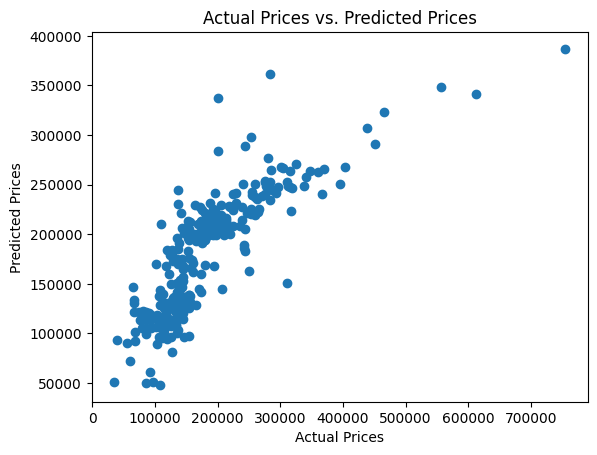

In [96]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

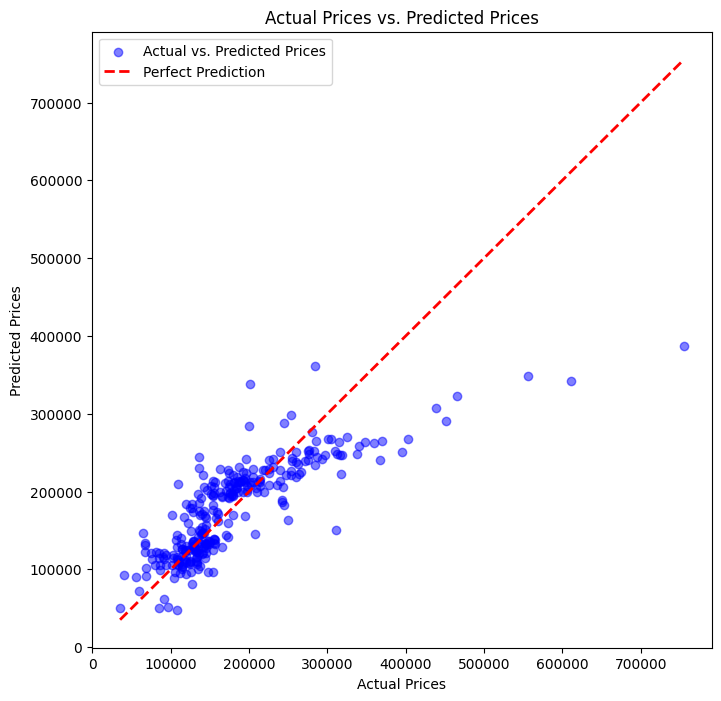

In [97]:
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5, label='Actual vs. Predicted Prices')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.legend()
plt.show()

In [102]:
def predict_price(base , area , bedrooms , bsmtfullbath , bsmthalfbath , fullbath , halfbath):
    input_data = pd.DataFrame({'TotalBsmtSF' : [base],'LotArea' : [area] , 'BedroomAbvGr' : [bedrooms], 'BsmtFullBath' : [bsmtfullbath], 'BsmtHalfBath': [bsmthalfbath] , 'FullBath' : [fullbath], 'HalfBath' : [halfbath] })
    predicted_price = model.predict(input_data)
    return predicted_price[0]



In [104]:
base = int(input("Enter the basearea for the house: "))
area = int(input("Enter the area of the house: "))
bedrooms = int(input("Enter the number of bedrooms: "))
bsmtfullbath = int(input("Enter the number of fullbathrooms in the basement: "))
bsmthalfbath = int(input("Enter the number of halfbathrooms in the basement: "))
halfbath = int(input("Enter the number of halfbathrooms: "))
fullbath = int(input("Enter the number of fullbathrooms: "))

predicted_price = predict_price(base , area , bedrooms , bsmtfullbath , bsmthalfbath , fullbath , halfbath)

print(f'The predicted price for a house with area {area}, {bedrooms} bedrooms, bathrooms are {bath} is ${predicted_price:.2f}')

Enter the basearea for the house: 3202
Enter the area of the house: 2000
Enter the number of bedrooms: 4
Enter the number of fullbathrooms in the basement: 2
Enter the number of halfbathrooms in the basement: 1
Enter the number of halfbathrooms: 1
Enter the number of fullbathrooms: 3
The predicted price for a house with area 2000, 4 bedrooms, bathrooms are 2 is $465178.76
